In [1]:
from algorithms import naiv_Fibonacci, memo_Fibonacci, bottom_up_Fibonaci, naiv_short_path, memo_short_path
from timeit import timeit

Comparing Fibonacci algorithms

In [28]:
n = 40

In [29]:
%%time
naiv_Fibonacci(n)

The 40-th Fibonacci number is 102334155
CPU times: total: 13.4 s
Wall time: 13.5 s


In [30]:
%%time
memo_Fibonacci(n)

The 40-th Fibonacci number is 102334155
CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%%time
memo_Fibonacci(1000)

The 1000-th Fibonacci number is 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
CPU times: total: 0 ns
Wall time: 1 ms


In [34]:
%%time
bottom_up_Fibonaci(n)

The 40-th Fibonacci number is 102334155
CPU times: total: 0 ns
Wall time: 978 µs


In [35]:
%%time
bottom_up_Fibonaci(1000)

The 1000-th Fibonacci number is 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
CPU times: total: 0 ns
Wall time: 997 µs


We can see that even for n = 40 the naive algorithm took extremely long to compute, the correct algorithms had answer immediately. I am going to use timeit modul to compare speed only of the correct algorithms

In [3]:
%%time
#testing algorithm with memoization
for i in range(1000):
    memo_Fibonacci(100, False)

CPU times: total: 62.5 ms
Wall time: 51 ms


In [4]:
%%time
#testing algorithm with bottom up approach
for i in range(1000):
    memo_Fibonacci(100, False)

CPU times: total: 46.9 ms
Wall time: 44 ms


Now I am going to show sollutions of algorithms that should find shortest path in graph shown bellow

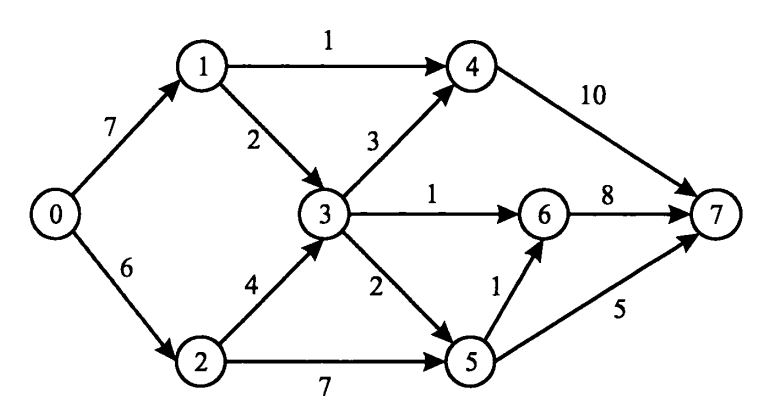

In [6]:
%matplotlib inline
from IPython.display import Image
Image('graph.PNG')

In [12]:
num_nodes = 8
s_node = 0
t_node = 7
#dictionary that represents weight function for each edge
w = {(0,1):7, (0,2):6, (1,2):2, (1,4):1, (2,3):4, (2,5):7, (3,4):3, (3,6):1, (3,5):2, (4,7):10, (6,7):8, (5,6):1, (5,7):5}  

In [36]:
%%time
naiv_short_path(num_nodes, s_node, t_node, w)

Value of shortest path is 17
Shortest path is:
0 -> 2 -> 3 -> 5 -> 7
CPU times: total: 0 ns
Wall time: 0 ns


In [37]:
%%time
memo_short_path(num_nodes, s_node, t_node, w)

Value of shortest path is 17
Shortest path is:
0 -> 2 -> 3 -> 5 -> 7
CPU times: total: 0 ns
Wall time: 0 ns


I will show that for graph in which there is no path algorithm will detect it and for cyclic graph there is possibility of infinity algorithm

In [38]:
%%time
memo_short_path(num_nodes=5, s_node=0, t_node=4, w={(0,1):2, (0,3):5, (1,3):1, (2,4):6})

There does not exist path from node s to node t
CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
%%time
memo_short_path(num_nodes=4, s_node=0, t_node=3, w={(0,2):2, (2,1):1, (1,3):6, (3,2):5})

RecursionError: maximum recursion depth exceeded in comparison

We can see that if in graph was cycle (in this case from 3 to 2 to 1 to 3), then it is possible to run over limit of maximum recursions